In [51]:
%matplotlib inline

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as manim

In [52]:
def synthData1():
    '''
        Returns synthetic data for perceptron 1
    '''
    
    np.random.seed(sum([ord(s) for s in 'Perceptron']))
    m1 = 200
    x1 = np.random.random((2, m1))
    y1 = np.sum(x1.T * [2, 1], axis=1)
    y1 = y1.reshape(1, m1)
    return [x1, y1]

In [53]:
def synthData2():
    '''
        Returns sythetic data for perceptron 2
    '''
    
    np.random.seed(sum([ord(s) for s in 'Perceptron']))
    m2 = 100
    x2 = np.random.randn(2, m2) + [[0], [3]]
    x2 = np.concatenate([x2, np.random.randn(2, m2)], axis=1)
    y2 = np.array([[1] * m2 + [0] * m2])
    return [x2, y2]

In [54]:
x1, y1 = synthData1()
x2, y2 = synthData2()

In [55]:
x1.shape, y1.shape

((2, 200), (1, 200))

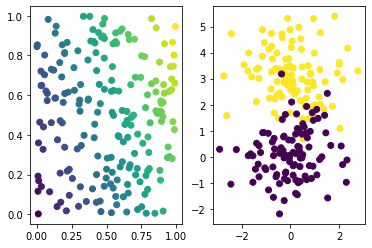

In [56]:
fig, (axA, axB) = plt.subplots(1, 2)

axA.scatter(*x1, c=y1.ravel())
axB.scatter(*x2, c=y2.ravel())
plt.show()

## Forward Pass

#### Equation of Perceptron:




#### The activation function (Sigmoid) is:




#### The cost function (Binary Crossentropy) is:


## Backprop

#### Gradients:



where,
- $m$ is the number of datapoints in the dataset
- $a^{i}$ is the $i_{th}$ component of vector $A$

## Optimization

The optimization function is $\theta = \theta - \alpha d \theta$

In [86]:
class Perceptron(object):
    def __init__(self, dim=2, alpha=0.1, iters=16, seed=1):
        super(Perceptron, self).__init__()
        
        self._alpha = alpha
        self._iters = iters
        np.random.seed(seed)
        
        self._w = np.random.randn(dim, 1)
        self._b = np.random.random()
        self._J = 0.0
        
        
    @property
    def J(self):
        return self._J
    
    def fit(self, X, y):
        w, b = self._w, self._b
        alpha = self._alpha
        m = y.shape[1]
        
        for i in range(self._iters):
            Z = np.dot(w.T, X) + b ## Dot product output
            A = 1 / (1 + np.exp(-Z)) ## Sigmoid activation of output

            dw = 1 / m * np.dot(X, (A - y).T) ## Partial differential of w
            db = 1 / m * np.sum(A - y, axis=1)

            w = w - alpha * dw
            b = b - alpha * db
            
        self._w, self._b = w, b
        
        ## Binary Cross-entropy
        self._J = -1 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A), axis=1)
        
    def pred(self, x, beta=0.5):
        w, b = self._w, self._b
        z = np.dot(w.T, x) + b
        a = 1 / (1 + np.exp(-z))
        
        return a > beta

In [89]:
perceptron1 = Perceptron(iters=20000)
perceptron2 = Perceptron(iters=20000)

In [90]:
perceptron1.fit(x1, y1)
perceptron2.fit(x2, y2)

C:\Users\yasho\anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


In [91]:
X1 = np.random.uniform(-3, 3, (2, 5000))
X2 = np.random.uniform(-3, 3, (2, 5000))

In [92]:
y1_hat = perceptron1.pred(X1)
y2_hat = perceptron2.pred(X2)

C:\Users\yasho\anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in exp


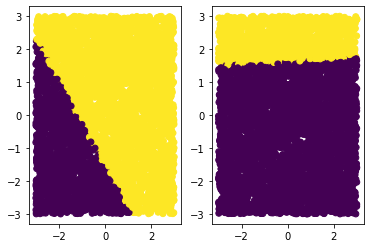

In [93]:
fig, (axA, axB) = plt.subplots(1, 2)

axA.scatter(*X1, c=y1_hat.ravel())
axB.scatter(*X2, c=y2_hat.ravel())
plt.show()